<a href="https://colab.research.google.com/github/akshatagrawal1998/Deep-Learning/blob/main/cat_vs_dog_Image_Classifier_(Akshat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The dataset was quite big, so we uploaded it from Kaggle directly to Google Colab using API token.
# Steps -
# Go to kaggle. Click on Your Profile then Account and the Click on Create API token.
# A json file will be downloaded in your system. Upload it here on Colab.
# rename it as kaggle.json and then follow below steps

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
# copy your API command from Kaggle and pase it here so that data can be downloaded

!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:31<00:00, 38.6MB/s]
100% 1.06G/1.06G [00:31<00:00, 36.0MB/s]


In [6]:
# This is downloaded from kaggle to server to our Google colab but is is in zip format. we need to unzip it.

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
# Now the data is loaded, we need to build our CNN model

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

In [10]:
# generators - a function that divide our data  into batches and load one by one so that due to lots of data, overload doesn't occur.

In [11]:
train_dataset = keras.utils.image_dataset_from_directory(
                directory = '/content/train',
                labels = 'inferred',
                label_mode = 'int', # assign 0 and 1 to cat and dog
                batch_size = 32,
                image_size = (256,256) # all the images will be reshaped as (256,256,3) as we have different size of images in our data
                                                        )

validation_dataset = keras.utils.image_dataset_from_directory(
                directory = '/content/test',
                labels = 'inferred',
                label_mode = 'int', # assign 0 and 1 to cat and dog respectively
                batch_size = 32,
                image_size = (256,256) # all the images will be reshaped as (256,256,3) as we have different size of images in our data
                                                        )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
validation_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
# now our images are stored as numpy array which has values between (0,255) but we need to normalize it

In [14]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)

In [15]:
# create CNN model
# 3 conv layers 

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2, padding = 'valid'))

model.add(Flatten())
# now 3 fully connected layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [17]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

# we see 625 batches as our batch size was 32 and 32*625=20000 i.e. training data size

Epoch 1/10
625/625 [==============================] - 93s 126ms/step - loss: 0.6049 - accuracy: 0.6607 - val_loss: 0.5245 - val_accuracy: 0.7390
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4727 - accuracy: 0.7761 - val_loss: 0.4605 - val_accuracy: 0.7904
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3668 - accuracy: 0.8342 - val_loss: 0.4703 - val_accuracy: 0.8068
Epoch 4/10
625/625 [==============================] - 77s 122ms/step - loss: 0.2305 - accuracy: 0.9024 - val_loss: 0.6134 - val_accuracy: 0.7928
Epoch 5/10
625/625 [==============================] - 59s 94ms/step - loss: 0.1324 - accuracy: 0.9481 - val_loss: 0.8877 - val_accuracy: 0.7778
Epoch 6/10
625/625 [==============================] - 58s 91ms/step - loss: 0.0813 - accuracy: 0.9695 - val_loss: 0.9847 - val_accuracy: 0.7830
Epoch 7/10
625/625 [==============================] - 59s 94ms/step - loss: 0.0571 - accuracy: 0.9818 - val_loss: 1.1441 - val_accur

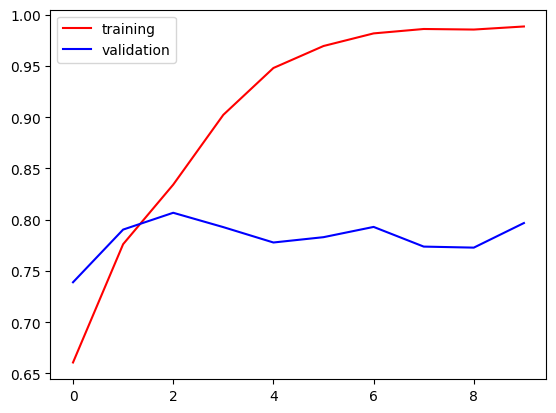

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'training')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')

plt.legend()
plt.show()

# we see that after 2 epochs, training accuracy is increasing but validation accuracy is stucked around 75-80%
# and the gap between red and blue line suggests overfitting

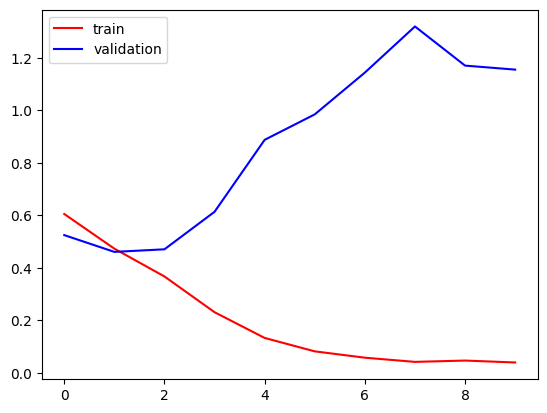

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# we see that after 2 epochs, training loss is decreasing but validation loss is increasing.
# and the gap between red and blue line suggests overfitting

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [28]:
# let's apply Batch Normalization and add Dropout layer

# create CNN model
# 3 conv layers 

model1 = Sequential()
model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2) , strides = 2, padding = 'valid'))

model1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2) , strides = 2, padding = 'valid'))

model1.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2) , strides = 2, padding = 'valid'))

model1.add(Flatten())
# now 3 fully connected layers
model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.1)) #learning rate
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.1)) #learning rate
model1.add(Dense(1, activation = 'sigmoid'))

In [30]:
model1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [31]:
history = model1.fit(train_ds, epochs = 10, validation_data = validation_ds)


Epoch 1/10
625/625 [==============================] - 72s 110ms/step - loss: 1.3030 - accuracy: 0.6087 - val_loss: 0.6426 - val_accuracy: 0.6566
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5876 - accuracy: 0.7048 - val_loss: 0.5399 - val_accuracy: 0.7264
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4931 - accuracy: 0.7639 - val_loss: 0.5079 - val_accuracy: 0.7542
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4183 - accuracy: 0.8067 - val_loss: 0.4739 - val_accuracy: 0.7818
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 0.3615 - accuracy: 0.8414 - val_loss: 0.4124 - val_accuracy: 0.8154
Epoch 6/10
625/625 [==============================] - 84s 135ms/step - loss: 0.3077 - accuracy: 0.8697 - val_loss: 0.4191 - val_accuracy: 0.8110
Epoch 7/10
625/625 [==============================] - 85s 135ms/step - loss: 0.2272 - accuracy: 0.9087 - val_loss: 0.6663 - val_ac

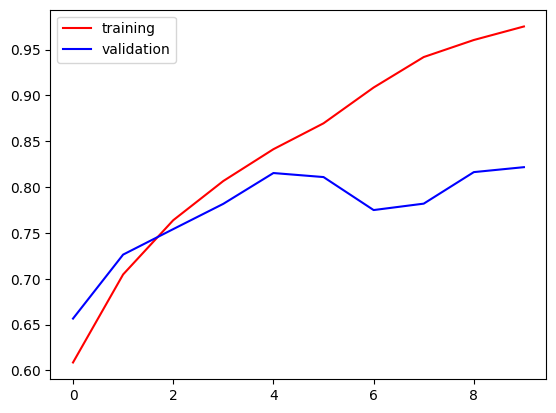

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'training')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')

plt.legend()
plt.show()

# better results than above
# validation accuracy is above 80% and also overfitting is reduced

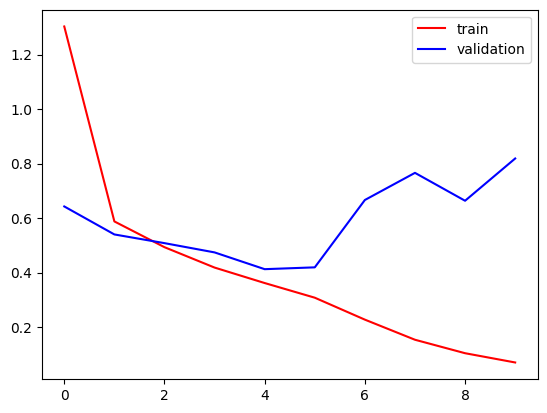

In [34]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# we see that training loss is decreasing but validation loss is increasing afte a certain epoch
# overfitting is reduced

In [35]:
import cv2

In [36]:
test_img = cv2.imread('/content/test_cat.jpg') # numpy array 

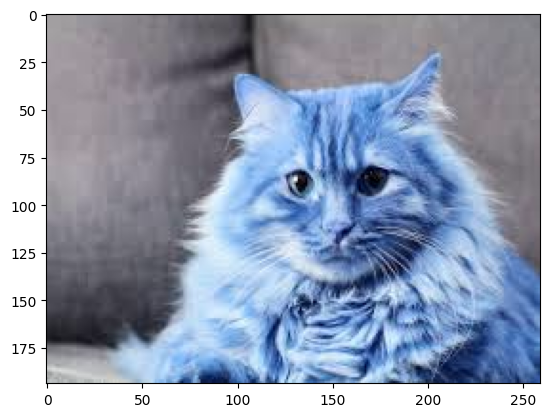

In [37]:
plt.imshow(test_img)

In [38]:
test_img.shape # shape of the image

(194, 259, 3)

In [39]:
test_img = cv2.resize(test_img, (256,256)) # resize to (256,256) as our model is trained accordingly

In [40]:
test_input = test_img.reshape((1,256,256,3)) # input is given in batches, so 1 image giving for test i.e our batch has 1 image

In [41]:
model.predict(test_input) # prediction from simple model


# 0 means cat
# 1 means dog

1/1 [==============================] - 0s 231ms/step


array([[0.]], dtype=float32)

In [42]:
model1.predict(test_input) # prediction from model using BatchNormalization amd Dropout

1/1 [==============================] - 0s 100ms/step


array([[1.]], dtype=float32)

In [43]:
img2 = cv2.imread('/content/test_dog.jpg')

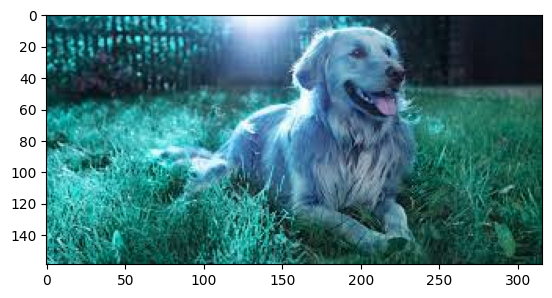

In [44]:
plt.imshow(img2)

In [45]:
img2.shape

(159, 316, 3)

In [46]:
img2 = cv2.resize(img2, (256,256))

In [48]:
img2.shape

(256, 256, 3)

In [49]:
test_img2 = img2.reshape((1,256,256,3))

In [50]:
model.predict(test_img2)

1/1 [==============================] - 0s 27ms/step


array([[1.]], dtype=float32)

In [51]:
model1.predict(test_img2)

1/1 [==============================] - 0s 87ms/step


array([[0.]], dtype=float32)